In [149]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from pymongo import MongoClient
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import numpy as np

import matplotlib.pyplot as plt
import datetime
import urllib.request
import json

resp = urllib.request.urlopen('http://localhost:7100/tickets/shanghai?st=2018-03-01&et=2018-04-09')
ticketData = resp.read()
ticketData = json.loads(ticketData)

resp = urllib.request.urlopen('http://localhost:7100/day/rank?st=2018-03-01&et=2018-04-09')
dayData = resp.read()
dayData = json.loads(dayData)

resp = urllib.request.urlopen('http://localhost:7100/weather/history?st=2018-03-01&et=2018-04-09')
weaData = resp.read()
weaData = json.loads(weaData)

resp = urllib.request.urlopen('http://localhost:7001/wait-times/park/shanghai?st=2018-03-01&et=2018-04-09')
parkData = resp.read()
parkData = json.loads(parkData)

[{'date': '2018-03-01',
  'endTime': '20:00:00',
  'flowAvg': 19890,
  'flowHour': [[9, 15326],
   [10, 19456],
   [11, 24018],
   [12, 24187],
   [13, 25345],
   [14, 26318],
   [15, 27134],
   [16, 26717],
   [17, 25335],
   [18, 23980],
   [19, 19639],
   [20, 16788]],
  'flowMax': 27134,
  'markAvg': 729,
  'markHour': [[9, 332],
   [10, 864],
   [11, 914],
   [12, 721],
   [13, 778],
   [14, 822],
   [15, 900],
   [16, 842],
   [17, 784],
   [18, 681],
   [19, 381],
   [20, 0]],
  'markMax': 1005,
  'startTime': '09:00:00'},
 {'date': '2018-03-02',
  'endTime': '20:00:00',
  'flowAvg': 18034,
  'flowHour': [[8, 5337],
   [9, 11835],
   [10, 19964],
   [11, 22250],
   [12, 22479],
   [13, 23051],
   [14, 24272],
   [15, 25060],
   [16, 25309],
   [17, 24640],
   [18, 23452],
   [19, 17514],
   [20, 16521]],
  'flowMax': 25454,
  'markAvg': 546,
  'markHour': [[8, 194],
   [9, 565],
   [10, 656],
   [11, 617],
   [12, 586],
   [13, 568],
   [14, 613],
   [15, 668],
   [16, 547],
   

[6.43932741]


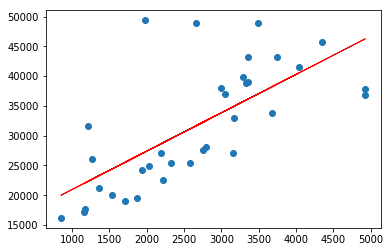

In [169]:
markMaxList = []
ticketList = []
flowList = []

for item in parkData:
    markMaxList.append(item['markAvg'])
    
    flowList.append(item['flowMax'])

for item in ticketData:
    ticketList.append(item['ticketNum'])
    
    
    
ticketLists = np.array(ticketList)
filterData = np.where(ticketLists < 5000)

x = []
y = []

for index in filterData[0]:
    x.append(ticketList[index])
#     y.append(markMaxList[index])
    y.append(flowList[index])

x = np.array(x)
y = np.array(y)

xx = xx.reshape((len(x), -1))

plt.scatter(x, y)

regr = linear_model.LinearRegression()
regr.fit(xx, y)

plt.plot(xx, regr.predict(xx), color='red',linewidth=1)
print(regr.coef_)

